In [10]:
#нагенерить автопризнаков

import os
from dotenv import load_dotenv, find_dotenv
load_dotenv()
import mlflow

import warnings
warnings.filterwarnings("ignore")

%reload_ext autoreload

import os
import pandas as pd

from sqlalchemy import create_engine

# подгружаем .env

# Считываем все креды
src_host = os.environ.get('DB_SOURCE_HOST')
src_port = os.environ.get('DB_SOURCE_PORT')
src_username = os.environ.get('DB_SOURCE_USER')
src_password = os.environ.get('DB_SOURCE_PASSWORD')
src_db = os.environ.get('DB_SOURCE_NAME') 

dst_host = os.environ.get('DB_DESTINATION_HOST')
dst_port = os.environ.get('DB_DESTINATION_PORT')
dst_username = os.environ.get('DB_DESTINATION_USER')
dst_password = os.environ.get('DB_DESTINATION_PASSWORD')
dst_db = os.environ.get('DB_DESTINATION_NAME')

s3_bucket = os.environ.get('S3_BUCKET_NAME')
s3_access_key = os.environ.get('AWS_ACCESS_KEY_ID')
s3_secret_access_key = os.environ.get('AWS_SECRET_ACCESS_KEY')

# Создадим соединения
src_conn = create_engine(f'postgresql://{src_username}:{src_password}@{src_host}:{src_port}/{src_db}')
dst_conn = create_engine(f'postgresql://{dst_username}:{dst_password}@{dst_host}:{dst_port}/{dst_db}')

In [21]:
# в результате ETL pipeline создана таблица flats_data

TABLE = 'flats_data'
SQL = f'select * from {TABLE}'
data_set = pd.read_sql(SQL, dst_conn)
data_set

,id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator,floor,is_apartment,rooms,total_area,price
0,56421,2013,2,55.946259,37.346073,2.78,355,19,true,7,false,1,44,9250000
1,56422,2010,2,55.819996,37.463306,3.00,384,30,true,5,false,3,93,30000000
2,56423,1999,4,55.534943,37.519520,2.64,119,12,true,7,false,2,53,13500000
3,56424,2018,2,55.785168,37.564041,3.00,356,17,true,6,false,3,86,25966368
4,56425,2010,4,55.723095,37.901379,2.78,368,24,true,19,false,1,47,11500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126121,67087,2004,4,55.875774,37.643093,2.74,220,14,true,6,false,2,63,12990000
126122,67088,1989,4,55.748848,37.419163,2.70,298,16,true,12,false,1,46,12700000
126123,67089,1966,0,55.855228,37.442364,2.64,214,9,true,3,false,1,29,6800000
126124,67090,1984,4,55.691463,37.729366,2.48,174,22,true,11,false,3,78,13490000


In [ ]:
#ПРОБУЮ
#data_set=data_set.head(60000)

In [ ]:
#разделим опять признаки

#бинарные - has_elevator, is_apartment
#binary_cat_features=data_set[['has_elevator', 'is_apartment']]
#числовые - build_year, latitude, longitude, ceiling_height, flats_count, floors_total, floor, rooms, total_area
#num_features=data_set[['build_year', 'ceiling_height', 'floors_total', 'floor', 'rooms', 'total_area','flats_count']] #'latitude', 'longitude', 

#target=data_set['price']
#категории - building_type_int - пока убрал признак

In [ ]:
#пробускаю трансформации!!!!!
#Объединяем трансформации

#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import StandardScaler
#from category_encoders import CatBoostEncoder

#binary_cols = binary_cat_features.columns.tolist()
#num_cols = num_features.columns.tolist()

# определите список трансформаций в рамках ColumnTransformer
#preprocessor = ColumnTransformer(
#[
#    ('binary',OneHotEncoder(drop='if_binary'),binary_cols),
    #('non_binary',CatBoostEncoder(),cat_features),
#    ('num',StandardScaler(),num_cols)
#],verbose_feature_names_out=False,remainder='drop'
#)

# трансформируйте исходные данные data с помощью созданного preprocessor
#data_transformed = preprocessor.fit_transform(data_set,data_set['price'])
#print(data_transformed)


#data_transformed=pd.DataFrame(data_transformed, columns=preprocessor.get_feature_names_out())
#print(pd.DataFrame(data_transformed, columns=preprocessor.get_feature_names_out()))

#data.info()

In [ ]:
#data_transformed.columns

In [ ]:
#делаю 1 dataframe
#df=data_transformed
#df['price']=data_set['price']
#df.head(3)

In [ ]:
# это Х
#features=data_transformed.columns #drop(['price'], axis=1).columns

#target=['price']

#df[target]

In [22]:
# вот отсюда продолжаю
# VVVVVVV
data_set=data_set.drop(columns=['has_elevator','is_apartment'])

x=data_set.drop(['price'], axis=1)
y=data_set['price']




from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,
    #df[features],df[target],
    test_size=0.2) 

In [23]:
X_train

,id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,floor,rooms,total_area
100013,79908,1979,4,55.899834,37.608051,2.64,127,16,7,1,36
74309,35793,2002,4,55.655930,37.777248,2.64,82,7,4,2,56
101409,81402,2000,2,55.665234,37.761734,2.80,248,25,2,1,35
27310,102414,1954,1,55.771473,37.649311,3.20,85,8,4,1,43
63651,22798,2009,4,55.651680,37.343361,2.64,112,15,15,2,54
...,...,...,...,...,...,...,...,...,...,...,...
61615,20303,1965,4,55.796543,37.728378,2.48,116,5,1,6,132
15267,89647,2007,2,55.897366,37.389732,3.00,206,11,5,1,46
69103,29304,2002,4,55.547279,37.534317,2.64,168,14,14,3,75
4326,61057,1966,1,55.747910,37.551231,3.00,70,13,6,3,69


In [ ]:
#df.head(3)

,has_elevator_true,is_apartment_true,build_year,ceiling_height,floors_total,floor,rooms,total_area,flats_count,price
0,1.0,0.0,1.261852,0.205126,0.893463,-0.063629,-1.208993,-0.524229,0.630995,9250000
1,1.0,0.0,1.121919,1.358109,2.779490,-0.437369,1.024712,1.267883,0.792159,30000000
2,1.0,0.0,0.608828,-0.528590,-0.306737,-0.063629,-0.092140,-0.195066,-0.680544,13500000


In [ ]:
#features

In [24]:
df=data_set

df.columns

Index(['id', 'build_year', 'building_type_int', 'latitude', 'longitude',
       'ceiling_height', 'flats_count', 'floors_total', 'floor', 'rooms',
       'total_area', 'price'],
      dtype='object')

In [25]:
#Вот так удаляет

#df=df.drop(columns=['has_elevator','is_apartment'])
#df.drop([], axis=1)

df

,id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,floor,rooms,total_area,price
0,56421,2013,2,55.946259,37.346073,2.78,355,19,7,1,44,9250000
1,56422,2010,2,55.819996,37.463306,3.00,384,30,5,3,93,30000000
2,56423,1999,4,55.534943,37.519520,2.64,119,12,7,2,53,13500000
3,56424,2018,2,55.785168,37.564041,3.00,356,17,6,3,86,25966368
4,56425,2010,4,55.723095,37.901379,2.78,368,24,19,1,47,11500000
...,...,...,...,...,...,...,...,...,...,...,...,...
126121,67087,2004,4,55.875774,37.643093,2.74,220,14,6,2,63,12990000
126122,67088,1989,4,55.748848,37.419163,2.70,298,16,12,1,46,12700000
126123,67089,1966,0,55.855228,37.442364,2.64,214,9,3,1,29,6800000
126124,67090,1984,4,55.691463,37.729366,2.48,174,22,11,3,78,13490000


In [26]:
#библиотека autofeat нормально работает на 1 датафрейме
#df.head(3)

#cat_features = ['has_elevator_true','is_apartment_true']
cat_features=['has_elevator']
feating_features=['rooms', 'floors_total','ceiling_height', 'floor', 'total_area','flats_count']

from autofeat import AutoFeatRegressor
transformations = ('abs','1/', 'log', 'abs', 'sqrt')

afc = AutoFeatRegressor(#categorical_cols=cat_features,
                        feateng_cols=feating_features, 
                        transformations=transformations, max_gb=16,feateng_steps=1,#2
                        n_jobs=-1)
    #categorical_cols=cat_features, feateng_cols
                        

X_train_features = afc.fit_transform(X_train,y_train) # примените автоэнкодер признаков для данных для обучения
X_test_features = afc.transform(X_test) # примените автоэнкодер признаков для данных для валидации/теста

In [27]:
X_train_features.head(2).T

,0,1
id,79908.000000,35793.000000
build_year,1979.000000,2002.000000
building_type_int,4.000000,4.000000
latitude,55.899834,55.655930
longitude,37.608051,37.777248
ceiling_height,2.640000,2.640000
flats_count,127.000000,82.000000
floors_total,16.000000,7.000000
floor,7.000000,4.000000
rooms,1.000000,2.000000


In [28]:
#регрессия - предсказание числа

#from sklearn.linear_model import Lasso
#model=Lasso()
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(X_train_features,y_train)
y_pred=model.predict(X_test_features)


features=pd.DataFrame(X_train_features.columns)
features.columns=['feature']
features['coeff']=model.coef_/1000
features

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

df_result=pd.DataFrame(y_test/1000) 

df_result['y_pred']=y_pred/1000
df_result

,price,y_pred
19411,15700.00,7812.363929
29330,7950.00,10974.517184
51014,8000.00,6670.444823
106750,50059.86,37467.447328
33906,8000.00,11748.489112
...,...,...
71013,8400.00,11768.557194
80765,9999.99,9935.057637
25235,8250.00,6862.857529
8486,12400.00,9094.121300


In [29]:
#import numpy as np

r2_score(y_test,y_pred)

0.6885244251596336

In [ ]:
#Расчет метрик

#from sklearn.metrics import roc_auc_score,log_loss,f1_score,confusion_matrix,precision_score,recall_score

# расчёт метрик качества
#metrics = {}
#_, err1, _, err2 = confusion_matrix(y_val, y_pred, normalize='all').ravel()
#r2_sc = r2_score(y_val,y_pred)
#metrics["r2"] = r2_sc

#metrics


{'r2': 0.6709275672967414}

In [ ]:
r2_sc

0.6709275672967414

In [ ]:
#import os
#os.mkdir('artifacts')

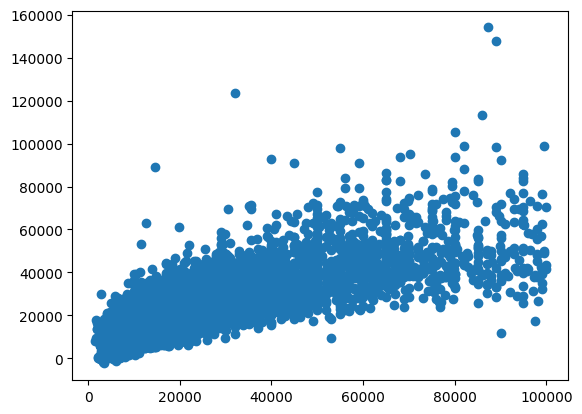

In [ ]:
import matplotlib.pyplot as plt

fig=plt.scatter(df['price'],df['y_pred'])
fig
plt.savefig("artifacts/base_figure.png")

In [ ]:
#пузырьковая диаграмма
#import plotly.express as px

#fig=px.scatter(df,x='price',y='y_pred',opacity=0.6)
#fig

In [ ]:
##MLFLOW info

TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000

EXPERIMENT_NAME = "sprint_2_project_experiment"
RUN_NAME = "sprint_2_project_run_name"
REGISTRY_MODEL_NAME ="base_model_price"

os.environ["MLFLOW_S3_ENDPOINT_URL"] = "https://storage.yandexcloud.net"
os.environ["AWS_ACCESS_KEY_ID"] = os.getenv("AWS_ACCESS_KEY_ID")
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv("AWS_SECRET_ACCESS_KEY")

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

if mlflow.get_experiment_by_name(name=EXPERIMENT_NAME):
    experiment_id = dict(mlflow.get_experiment_by_name(name=EXPERIMENT_NAME))['experiment_id']
    mlflow.set_experiment(experiment_id=experiment_id)
else:
    mlflow.set_experiment(EXPERIMENT_NAME)
    experiment_id = dict(mlflow.get_experiment_by_name(name=EXPERIMENT_NAME))['experiment_id']
    mlflow.set_experiment(experiment_id=experiment_id)
  

In [ ]:
experiment_id

'23'

In [ ]:
#pip_requirements="requirements.txt" 
signature = mlflow.models.infer_signature(X_val, y_val)
input_example = X_val[:10]




In [ ]:

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)

    r2_sc = r2_score(y_val,y_pred)

    model_info = mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="models_sprint2",
        registered_model_name=REGISTRY_MODEL_NAME,
        signature=signature,
        input_example=input_example,
        #pip_requirements=pip_requirements, 
        await_registration_for=60
		)
    mlflow.log_metric("r2", r2_sc)
  #  mlflow.log_artifact("artifacts/base_figure.png","artifacts")

Registered model 'base_model_price' already exists. Creating a new version of this model...
2024/12/03 17:37:47 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: base_model_price, version 5
Created version '5' of model 'base_model_price'.
